<div class="alert alert-block alert-success">
    
# ITI5212 Data Analysis for Semi Structure Data Assignment 2
#### Student Name: Robiatul Adawiyah Al-Qosh
#### Student ID: 34269193

Date: 24/02/2025

Environment: Python 3.11

</div>

<div class="alert alert-block alert-info">
    
## Table of Content

[Introduction](#intro) <br>
[Libraries Used](#libraries) <br>
[Exploratory Data Analysis](#eda) <br>
[Data Cleaning](#clean) <br>
[Model Selections](#model) <br>
[Hyperparameter Determinations](#hyper) <br>
[Model Training](#train) <br>
[Test Predictions](#test) <br>
[Summary](#summary) <br>
[References](#ref) <br>

</div>


In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block alert-info">

## Introduction <a class="anchor" name="intro"></a>

This task is the part of of ITI5212 Data Analysis for Semi-Structured Data Assignment 2, which involves developing a recommender system capable of predicting user ratings for products in the Amazon product dataset. The primary goal of this assignment is to predict the ratings that users would give to products in the test dataset. The performance of the model is evaluated based on the Root Mean Square Error (RMSE) score, where lower RMSE values indicate better predictive performance. The predicted ratings are submitted to a Kaggle competition page, which ranks participants based on their RMSE scores.
</div>

<div class="alert alert-block alert-warning">

## Libraries Used <a class="anchor" name="libraries"></a>

The libraries that used in this project include:

- pandas: for data manipulation tasks.
- numpy: for numerical operations and array manipulation.
- matplotlib.pyplot: for data visualization through plots and graphs.
- seaborn: for creating more visually appealing statistical graphics.
- scipy.sparse: for creating and handling sparse matrices.
- surprise: for building recommender system models.
    - Reader: to define the rating scale and structure of the dataset.
    - Dataset: to load the rating data into the Surprise framework.
    - KNNBasic: for implementing K-Nearest Neighbors collaborative filtering.
    - NMF: for implementing Non-negative Matrix Factorization.
    - SVD: for implementing Singular Value Decomposition.
- surprise.model_selection: for cross-validation to evaluate model performance.

</div>

In [3]:
!pip install scikit-Surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-Surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505165 sha256=407a2c8749b07cebf12643bca77c10469728ffd913fab9e72cbbe2a540a7ae49
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-Surprise


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sparse
from surprise import Reader, Dataset, KNNBasic, NMF, SVD
from surprise.model_selection import cross_validate

<div class="alert alert-block alert-warning">

## Exploratory Data Analysis <a class="anchor" name="eda"></a>

Exploratory Data Analysis (EDA) is an essential step in understanding the dataset. This process involves summarizing the dataset's key characteristics, identifying patterns, and detecting anomalies. The EDA phase begins by loading the train dataset and examining its structure and statistical properties.
</div>

In [5]:
# Load the train dataset
train_df = pd.read_csv('/content/drive/MyDrive/S2 Monash University/MUI Y2 T2/ITI5212 Data Analysis for Semi Structure Data/ITI5212 Assignment/train.csv')
train_df

,user_id,product_id,product_name,rating,votes,helpful_votes,ID
0,1813,154533,Beautiful Thing,5,10,8,0
1,1944,192838,Almost Famous,5,4,2,1
2,534,202590,A Clockwork Orange,5,5,5,2
3,1811,140456,Great Expectations (Wordsworth Classics),4,1,0,3
4,102,154278,Phenomenon,5,0,0,4
...,...,...,...,...,...,...,...
745884,1853,25651,"Star by Star (Star Wars: The New Jedi Order, B...",1,1,1,745884
745885,1556,19657,"NIV Study Bible, Personal Size Indexed",5,13,11,745885
745886,1737,157371,An Ideal Husband,4,1,1,745886
745887,1916,24941,The Autobiography of Malcolm X (As Told to Ale...,5,1,1,745887


In [ ]:
# See the dataset information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745889 entries, 0 to 745888
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        745889 non-null  int64 
 1   product_id     745889 non-null  int64 
 2   product_name   745889 non-null  object
 3   rating         745889 non-null  int64 
 4   votes          745889 non-null  int64 
 5   helpful_votes  745889 non-null  int64 
 6   ID             745889 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 39.8+ MB


There is no missing value in the train dataset.

In [ ]:
# See the dataset statistical information
train_df.describe(include='all')

,user_id,product_id,product_name,rating,votes,helpful_votes,ID
count,745889.000000,745889.000000,745889,745889.000000,745889.000000,745889.000000,745889.000000
unique,NaN,NaN,178037,NaN,NaN,NaN,NaN
top,NaN,NaN,The Hobbit,NaN,NaN,NaN,NaN
freq,NaN,NaN,783,NaN,NaN,NaN,NaN
mean,1143.427653,116563.109093,NaN,4.238671,7.408667,5.381212,372944.000000
std,625.686509,68180.221826,NaN,1.072359,16.949467,13.089394,215319.751804
min,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000
25%,590.000000,54561.000000,NaN,4.000000,1.000000,1.000000,186472.000000
50%,1227.000000,119997.000000,NaN,5.000000,4.000000,2.000000,372944.000000
75%,1748.000000,182973.000000,NaN,5.000000,8.000000,6.000000,559416.000000


In [ ]:
# See the unique values of each column
train_df.nunique()

,0
user_id,2000
product_id,201325
product_name,178037
rating,5
votes,348
helpful_votes,296
ID,745889


In [ ]:
# See if there is any data duplicate
train_df.duplicated().sum()

0

In [ ]:
# Look for data duplicate particularly in user_id and product_id
train_df[train_df.duplicated(subset=['user_id', 'product_id'])]

,user_id,product_id,product_name,rating,votes,helpful_votes,ID


The dataset also do not have any data duplicate.

In [ ]:
# Data disribution for rating column
rating_distribution = train_df['rating'].value_counts().reset_index()
rating_distribution.columns = ['rating', 'total_rating']
rating_distribution

,rating,total_rating
0,5,416231
1,4,185193
2,3,79870
3,2,35446
4,1,29149


There are too many 5 stars ratings than low ratings, this shows that users are more interested in rating the items they like.

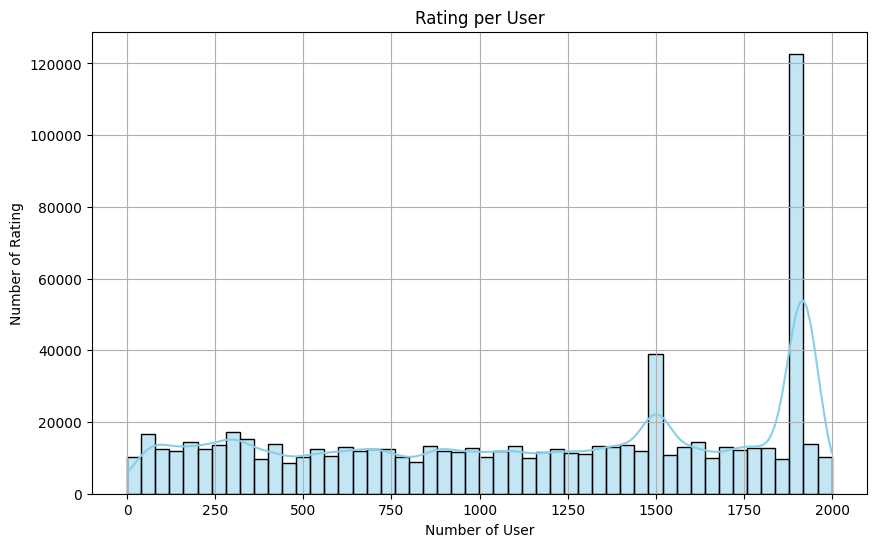

In [ ]:
# Data distribution for rating per user_id
plt.figure(figsize=(10, 6))
sns.histplot(train_df['user_id'], bins=50, kde=True, color='skyblue')
plt.title("Rating per User")
plt.xlabel("Number of User")
plt.ylabel("Number of Rating")
plt.grid(True)
plt.show()

For data distribution, it can be seen that there are two users who rated a lot of items, so these users can be categorized as outliers.

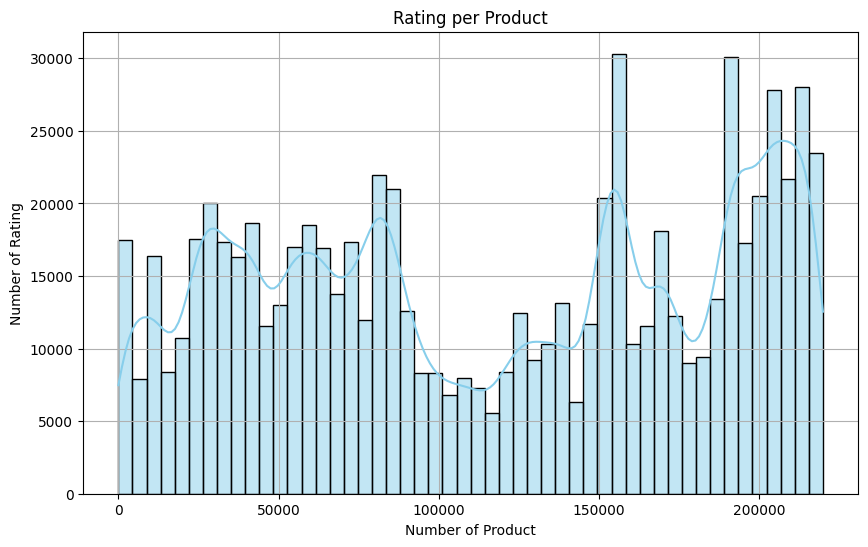

In [ ]:
# Data distribution for rating per product_id
plt.figure(figsize=(10, 6))
sns.histplot(train_df['product_id'], bins=50, kde=True, color='skyblue')
plt.title("Rating per Product")
plt.xlabel("Number of Product")
plt.ylabel("Number of Rating")
plt.grid(True)
plt.show()

As for products, the number of ratings each product has varies greatly, but this is not a big problem.

<div class="alert alert-block alert-warning">

## Data Cleaning <a class="anchor" name="clean"></a>

The next step is data cleaning, a crucial process to ensure that the data is ready for further analysis. This stage involves handling outliers and filtering only relevant data, as well as converting data formats to match the requirements of the model. Proper data cleaning helps improve the model's performance and ensures more accurate results.
</div>

First, users with more than 20,000 data points (considered outliers based on the previous histogram) are filtered, leaving only up to 20,000 data points per user, while the excess data is removed.

In [6]:
# Count the number of rating per user_id
user_counts = train_df['user_id'].value_counts()

# Filter users with more than 20000 ratings
high_users = user_counts[user_counts > 20000].index

# Limit maximum 20000 ratings per user
train_df = train_df.groupby('user_id').apply(lambda x: x.head(20000) if len(x) > 20000 else x).reset_index(drop=True)

After ensuring that the number of ratings per user_id does not exceed 20,000, the rating is then defined, and the user_id, product_id, and rating data are loaded into the Surprise library format.

In [7]:
# Determine the rating scale (1 - 5)
reader = Reader(rating_scale=(1, 5))

# Loading data into Surprise format
surprise_data = Dataset.load_from_df(train_df[['user_id', 'product_id', 'rating']], reader)

<div class="alert alert-block alert-warning">

## Model Selections <a class="anchor" name="model"></a>

There are various models available for building recommender systems. Therefore, the model selection phase is necessary to determine which model is best suited for the available training data. This process is conducted on three models from the Surprise library by evaluating them using 5-fold cross-validation.

It is important to note that this assignment only implements Collaborative Filtering for the recommender system. The Content-Based Filtering method using TF-IDF with Cosine Similarity could not be applied due to system crashes caused by memory limitations when processing the data.
</div>

In [ ]:
# KNN Model
knn_model = KNNBasic()
# Run 5-fold cross-validation and print results
cross_validate(knn_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9879  0.9897  0.9840  0.9859  0.9890  0.9873  0.0021  
MAE (testset)     0.7099  0.7113  0.7070  0.7088  0.7116  0.7097  0.0017  
Fit time          0.56    0.74    0.73    0.72    0.72    0.69    0.07    
Test time         4.53    3.50    4.21    3.50    3.85    3.92    0.40    


{'test_rmse': array([0.98794008, 0.98969949, 0.98402331, 0.98587591, 0.98900702]),
 'test_mae': array([0.7098549 , 0.71133319, 0.70700967, 0.7088109 , 0.71160308]),
 'fit_time': (0.5568442344665527,
  0.7382302284240723,
  0.7269542217254639,
  0.7201793193817139,
  0.7156393527984619),
 'test_time': (4.530852794647217,
  3.496880292892456,
  4.21245813369751,
  3.503389358520508,
  3.85429048538208)}

In [ ]:
# NMF Model
nmf_model = NMF()
cross_validate(nmf_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0337  1.0464  1.0440  1.0365  1.0410  1.0403  0.0047  
MAE (testset)     0.7915  0.8063  0.8041  0.7952  0.8020  0.7998  0.0056  
Fit time          23.76   24.09   25.07   24.67   23.88   24.29   0.50    
Test time         1.36    1.10    0.94    0.92    0.95    1.05    0.16    


{'test_rmse': array([1.03368752, 1.04643206, 1.04396159, 1.03654635, 1.0409994 ]),
 'test_mae': array([0.79151976, 0.80629282, 0.80407592, 0.79523449, 0.80201355]),
 'fit_time': (23.762831687927246,
  24.086033582687378,
  25.068784713745117,
  24.668750524520874,
  23.880545616149902),
 'test_time': (1.3553738594055176,
  1.097836971282959,
  0.943267822265625,
  0.9183616638183594,
  0.9543981552124023)}

In [ ]:
# SVD Model
svd_model = SVD()
cross_validate(svd_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9205  0.9150  0.9130  0.9180  0.9187  0.9171  0.0027  
MAE (testset)     0.6817  0.6773  0.6771  0.6795  0.6827  0.6797  0.0023  
Fit time          10.58   10.56   10.52   10.95   10.48   10.62   0.17    
Test time         1.22    1.21    1.22    1.23    1.20    1.22    0.01    


{'test_rmse': array([0.92053703, 0.91503773, 0.91303291, 0.91798323, 0.91866685]),
 'test_mae': array([0.68171955, 0.67730319, 0.67706575, 0.67954445, 0.6827336 ]),
 'fit_time': (10.5822913646698,
  10.564376592636108,
  10.516804933547974,
  10.953849077224731,
  10.478981494903564),
 'test_time': (1.2193727493286133,
  1.2119557857513428,
  1.2185544967651367,
  1.2295422554016113,
  1.2026925086975098)}

Among the three models mentioned above (KNN, NMF, and SVD), SVD performs the best by producing the lowest MAE and RMSE. Therefore, this model is selected for this project.

<div class="alert alert-block alert-warning">

## Hyperparameter Tuning <a class="anchor" name="hyper"></a>

After selecting the model to be used, the next step is hyperparameter tuning to find the best hyperparameter configuration that produces the optimal performance. This process aims to improve the model's accuracy by searching for the combination of hyperparameters that yields the best evaluation results.
</div>

This process initially utilized GridSearchCV, which identifies the best hyperparameters and applies them to the SVD model. However, for efficiency, the GridSearchCV code is commented out, and the selected hyperparameters are manually assigned to the SVD model.

Note: To run GridSearchCV, simply uncomment the relevant code.

In [ ]:
# Create and run hyperparameter grid search

# from surprise.model_selection import GridSearchCV

# parameters = {'n_factors': [100, 140],
#               'n_epochs': [100, 120],
#               'lr_all': [0.08, 0.085],
#               'reg_all': [0.01, 0.02]}

# gs = GridSearchCV(SVD, parameters, measures=['rmse'], cv=3)
# gs.fit(surprise_data)

# print("Best RMSE: ", gs.best_score['rmse'])
# print("Best Parameters: ", gs.best_params['rmse'])

'''
Best RMSE:  0.8563358026096616
Best Parameters:  {'n_factors': 140, 'n_epochs': 120, 'lr_all': 0.085, 'reg_all': 0.02}
'''

"\nBest RMSE:  0.8563358026096616\nBest Parameters:  {'n_factors': 140, 'n_epochs': 120, 'lr_all': 0.085, 'reg_all': 0.02}\n"

The SVD model with the best hyperparameters is then re-evaluated using 5-fold cross-validation to validate its performance before proceeding to the training phase. This step ensures that the selected hyperparameters consistently yield optimal results across different data splits.

In [8]:
# Run the cross validation for SVD model using the best hyperparameters
#gs_params = gs.best_params['rmse']
#best_svd_model = SVD(**gs_params)
best_svd_model = SVD(n_factors=140, n_epochs=120, lr_all=0.085, reg_all=0.02)
cross_validate(best_svd_model, surprise_data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8299  0.8303  0.8355  0.8306  0.8295  0.8312  0.0022  
MAE (testset)     0.6034  0.6028  0.6056  0.6030  0.6013  0.6032  0.0014  
Fit time          64.73   65.45   64.43   66.87   64.64   65.23   0.89    
Test time         0.85    0.89    0.93    1.35    0.91    0.99    0.18    


{'test_rmse': array([0.82992969, 0.8302811 , 0.83548877, 0.83064392, 0.82947075]),
 'test_mae': array([0.60337671, 0.60280612, 0.60560264, 0.60300066, 0.60133324]),
 'fit_time': (64.73418974876404,
  65.44738411903381,
  64.43135237693787,
  66.8727355003357,
  64.63985085487366),
 'test_time': (0.8512716293334961,
  0.8908007144927979,
  0.9348433017730713,
  1.3478591442108154,
  0.9060566425323486)}

<div class="alert alert-block alert-warning">

## Model Training <a class="anchor" name="train"></a>

The next and most crucial step is training the model, where the entire training dataset is utilized to obtain the optimal results. This process allows the model to learn from all available data and improve its prediction performance.
</div>

In [9]:
# Train the model using SVD with the best hyperparameters
trainset = surprise_data.build_full_trainset()
best_svd_model.fit(trainset)

<div class="alert alert-block alert-warning">

## Test Predictions <a class="anchor" name="test"></a>

The final step is applying the trained model to the test data, where the model makes predictions based on the learned patterns from the training phase.
</div>

In [10]:
# Load the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/S2 Monash University/MUI Y2 T2/ITI5212 Data Analysis for Semi Structure Data/ITI5212 Assignment/test.csv')
test_df

,ID,user_id,product_id,product_name
0,0,1916,185507,Maria [Australia]
1,1,1759,143430,"The Mitchells: Five for Victory (Van Stockum, ..."
2,2,1980,155861,Superman Cartoons of Max & Dav
3,3,1502,71535,The Rainbow Fish Anniversary Edition
4,4,1255,13521,Confessions (Oxford World's Classics)
...,...,...,...,...
223548,223548,1916,214704,"Godzilla, King of the Monsters"
223549,223549,1502,169489,Houses of the Holy
223550,223550,874,150908,Frankenstein and the Monster from Hell
223551,223551,922,198737,X-Men


In [11]:
# Run the test prediction with the SVD model that has been trained
predictions = [best_svd_model.predict(uid, iid).est for uid, iid in zip(test_df['user_id'], test_df['product_id'])]
test_df['rating'] = predictions

Lastly, the predictions are exported to a CSV file in the required format to be uploaded to Kaggle.

In [12]:
# Save the predictions into the csv file
test_df[['ID', 'rating']].to_csv('/content/drive/MyDrive/S2 Monash University/MUI Y2 T2/ITI5212 Data Analysis for Semi Structure Data/ITI5212 Assignment/34269193.csv', index=False)
print("34269193.csv has been saved!")

34269193.csv has been saved!


<div class="alert alert-block alert-info">

## Summary <a class="anchor" name="summary"></a>

In this project, a collaborative filtering-based recommender system was developed to predict user ratings for products in the Amazon dataset. Three models (KNN, NMF, and SVD) were evaluated using 5-fold cross-validation, with SVD selected as the final model due to its best performance.

Hyperparameter tuning was applied to optimize the SVD model further. The final model was trained on the entire dataset and used to generate predictions on the test set. The predictions were then exported to a CSV file for submission to Kaggle.

Despite initial attempts, content-based filtering with TF-IDF cosine similarity was excluded due to system crashes, making this project solely focused on collaborative filtering methods.
</div>

<div class="alert alert-block alert-info">

## References <a class="anchor" name="ref"></a>

- Monash University. (2025). Recommender_Systems_Part_1 [Jupyter Notebook]. Moodle. https://learning.monash.edu/course/view.php?id=25414&section=20
- Monash University. (2025). Recommender_Systems_Part_2 [Jupyter Notebook]. Moodle. https://learning.monash.edu/course/view.php?id=25414&section=24
- Leskovec, J., Rajaraman, A., & Ullman, J. D. (2020). Mining of Massive Datasets (3rd ed.). Cambridge University Press. Retrieved from http://www.mmds.org/
(Chapter 9: Recommender Systems)
- Aggarwal, C. C. (2016). Recommender Systems: The Textbook. Springer. https://doi.org/10.1007/978-3-319-29659-3
- OpenAI. (2025). Response to user query on NMF, GridSearchCV, and for debugging. ChatGPT (Version GPT-4) [Large language model]. https://chat.openai.com/
- Shah, R. (2025, February 15). Tune Hyperparameters with GridSearchCV. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
</div>